In [1]:
#test paga
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc

In [2]:
savepath = '/domino/edv/id-td-virology/Zhiyuan/public/Gut_remap/processed_data/B_cells.h5ad'
adata_B = sc.read_h5ad(savepath)

In [5]:
adata_B.uns.keys()

dict_keys(['disease_stage_colors', 'hvg', 'leiden_r0.2_colors', 'leiden_r0.8_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_r0.2', 'rank_genes_r0.8', 'sample_id_colors', 'subtype_colors', 'tissue_colors', 'umap'])

In [35]:
#remove doublets
adata_B = adata_B[adata_B.obs.subtype != 'doublets'].copy()
#remove plasma
adata_B = adata_B[adata_B.obs.subtype != 'Plasma'].copy()

In [36]:
sc.tl.paga(adata_B, groups='leiden_r0.2')

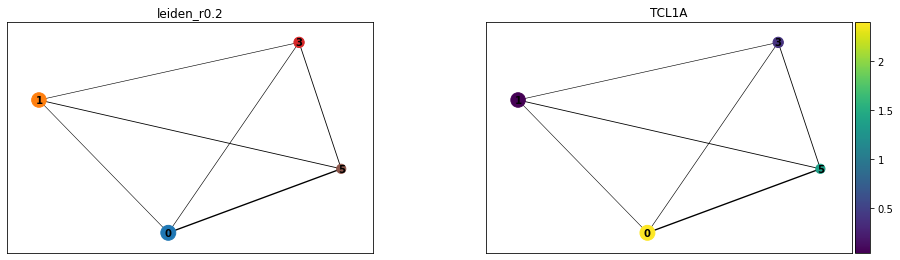

In [37]:
sc.pl.paga(adata_B, color=['leiden_r0.2', 'TCL1A'])

In [38]:
adata_B.obs.head()

,sample_id,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,total_counts_mt,pct_counts_mt,cell_quality,nCount_RNA,nFeature_RNA,RNA_snn_res.0.1,seurat_clusters,clusternames,tissue,leiden_r0.2,leiden_r0.8,subtype,disease_stage,gender,patient_ID,dpt_pseudotime
AAGTCTGGTGATGTCT-1-P190801_Liver_1,P190801_Liver_1,1340.0,3115.0,31.300161,178.0,5.714286,high,3115.0,1340.0,5.0,5.0,B,Liver,3,3,Antigen stimulated B,IA,female,P190801,0.113518
ACATGGTAGGTTCCTA-1-P190801_Liver_1,P190801_Liver_1,1823.0,5402.0,36.023695,239.0,4.424287,high,5402.0,1823.0,5.0,5.0,B,Liver,1,4,Memory B,IA,female,P190801,0.018792
ACATGGTGTTTCGCTC-1-P190801_Liver_1,P190801_Liver_1,1312.0,3733.0,39.646397,286.0,7.661398,high,3733.0,1312.0,5.0,5.0,B,Liver,3,3,Antigen stimulated B,IA,female,P190801,0.081185
AGAATAGGTTGCGTTA-1-P190801_Liver_1,P190801_Liver_1,568.0,1040.0,45.096154,216.0,20.769232,low,1040.0,568.0,5.0,5.0,B,Liver,3,3,Antigen stimulated B,IA,female,P190801,0.063764
AGATCTGGTACTCAAC-1-P190801_Liver_1,P190801_Liver_1,1403.0,5358.0,51.138485,535.0,9.985069,high,5358.0,1403.0,5.0,5.0,B,Liver,1,1,Memory B,IA,female,P190801,0.041625


In [39]:
sc.tl.paga(adata_B, groups='subtype')

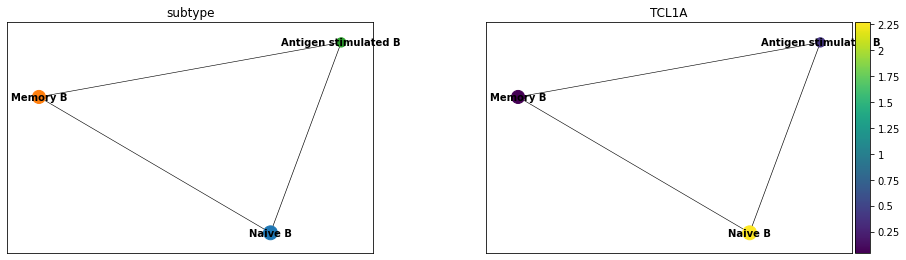

In [40]:
sc.pl.paga(adata_B, color=['subtype', 'TCL1A'])

In [41]:
sc.tl.draw_graph(adata_B, init_pos='paga')

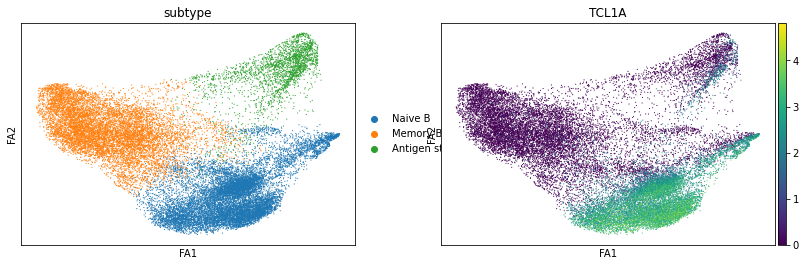

In [42]:
sc.pl.draw_graph(adata_B, color=['subtype', 'TCL1A'])

In [43]:
adata_B.uns['iroot'] = np.flatnonzero(adata_B.obs['subtype']  == 'Naive B')[0]

In [44]:
sc.tl.diffmap(adata_B)
sc.tl.dpt(adata_B)

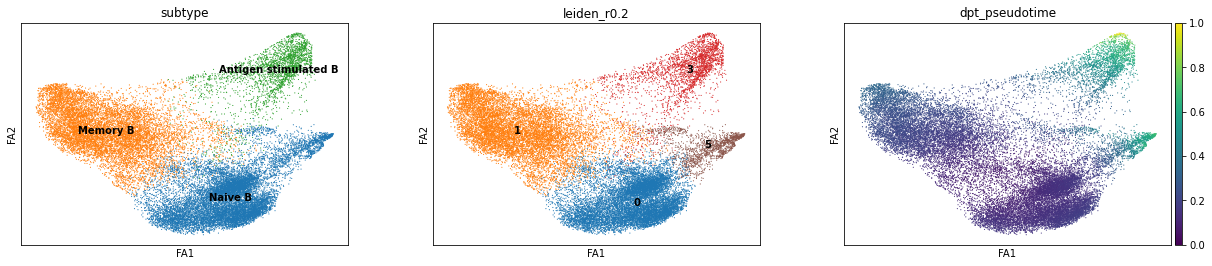

In [46]:
sc.pl.draw_graph(adata_B, color=['subtype', 'leiden_r0.2','dpt_pseudotime'], legend_loc='on data')